In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset


In [2]:
x_train=np.loadtxt('input.csv', delimiter=',')
y_train=np.loadtxt('labels.csv', delimiter=',')

x_test=np.loadtxt('input_test.csv', delimiter=',')
y_test=np.loadtxt('labels_test.csv', delimiter=',')

In [3]:
x_train=x_train.reshape(len(x_train), 100, 100, 3)
y_train=y_train.reshape(len(y_train), 1)

x_test=x_test.reshape(len(x_test), 100, 100, 3)
y_test=y_test.reshape(len(y_test), 1)

x_train = x_train/255.0
x_test=x_test/255.0

In [4]:
print("shape of x_train: ", x_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (2000, 100, 100, 3)
shape of y_train:  (2000, 1)
shape of x_test:  (400, 100, 100, 3)
shape of y_test:  (400, 1)


In [5]:
x_train[1, :]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

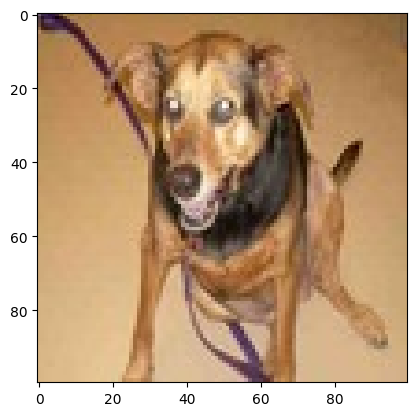

In [6]:
rd=random.randint(0, len(x_train))
plt.imshow(x_train[rd, :])
plt.show()

# Model

In [7]:
model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    
])

In [8]:
model=Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=20, batch_size=200)

Epoch 1/20
10/10 [==============================] - 13s 1s/step - loss: 0.4376 - accuracy: 0.7980
Epoch 2/20
10/10 [==============================] - 14s 1s/step - loss: 0.4190 - accuracy: 0.8110
Epoch 3/20
10/10 [==============================] - 16s 2s/step - loss: 0.3815 - accuracy: 0.8310
Epoch 4/20
10/10 [==============================] - 16s 2s/step - loss: 0.3556 - accuracy: 0.8500
Epoch 5/20
10/10 [==============================] - 16s 2s/step - loss: 0.3428 - accuracy: 0.8535
Epoch 6/20
10/10 [==============================] - 15s 2s/step - loss: 0.3087 - accuracy: 0.8755
Epoch 7/20
10/10 [==============================] - 14s 1s/step - loss: 0.2833 - accuracy: 0.8820
Epoch 8/20
10/10 [==============================] - 14s 1s/step - loss: 0.2763 - accuracy: 0.8900
Epoch 9/20
10/10 [==============================] - 14s 1s/step - loss: 0.2414 - accuracy: 0.9160
Epoch 10/20
10/10 [==============================] - 15s 2s/step - loss: 0.2078 - accuracy: 0.9280
Epoch 11/20
10/10 [

In [11]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 2s 76ms/step - loss: 0.5764 - accuracy: 0.6950


[0.5763581395149231, 0.6949999928474426]

# Predictions

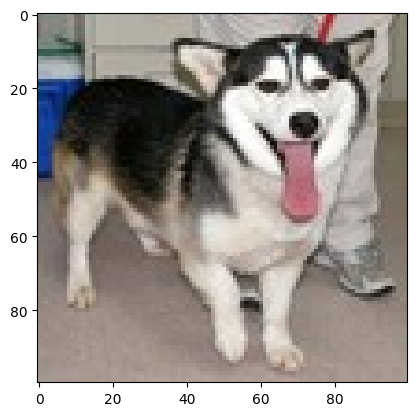

1/1 [==============================] - 0s 228ms/step
The animal is dog


In [12]:
rd2=random.randint(0, len(y_test))
plt.imshow(x_test[rd2, :])
plt.show()

y_pred=model.predict(x_test[rd2, :].reshape(1, 100, 100, 3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'
    
print("The animal is",pred)    